In [87]:
import sys
import importlib as imp
if ('Jupytils' in sys.modules):
    reloaded = imp.reload(Jupytils)
else:
    import Jupytils
    

## Configuring Notebook

### Installing nbExtensions
[ ] pip install https://github.com/ipython-contrib/IPython-notebook-extensions/archive/master.zip --user



### Configuring nbExtensions

[ ] Go to  http://localhost:8888/nbextensions
[ ] select extentions that you need

In [93]:
from sympy import *;
from sympy.physics import units as u;
from sympy.plotting import plot, plot_parametric

init_printing(use_latex='mathjax')
from collections import defaultdict

class GenerateSymbols(defaultdict):
    def __missing__(self, key):
        self[key] = Symbol(key)
        return self[key]

def plotit(expr, showPlot=False, xr = None, yr = None, zr= None):
    a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z = symbols("a b c d e f g h i j k l m n o p q r s t u v w x y z")
    symbs= GenerateSymbols()
    #expr = eval(expr,symbs);
    #xr = eval(xr,symbs)
    title=latex(expr)
    title = '$'+title+'$'
    titEs = title.replace("\\","\\\\")
    if (showPlot):
        display(expr)
        xr = (0,0,5) if xr is None else xr; 
        yr = (0,0,5) if yr is None else yr; 
        zr = (0,0,5) if zr is None else zr; 
        plot(expr, xr,yr,zr)
        #display(title)
    return title, titEs;

symbs= GenerateSymbols()

'1/(1+exp(-x))'

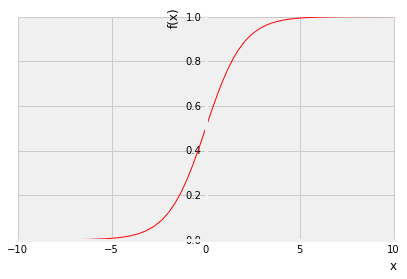

Latex commands $1/(1+exp(-x))$
$1/(1+exp(-x))$


In [94]:
#Usage of PlotIt functions are here

# To get Latex version of the expression
# Construct an expression and call plotit that returns 

expr = '1/(1+exp(-x))';
l, ll=plotit(expr, True)
print ("Latex commands", l+'\n'+ll)


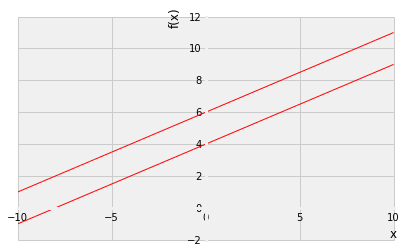

In [98]:
expr1 = '.5*x+4';
expr2 = '.5*x+6';

xr = yr = zr = None
xr = (0,0,5) if xr is None else xr; 
yr = (0,0,5) if yr is None else yr; 
zr = (0,0,5) if zr is None else zr; 
plot(expr1, expr2, xr,yr,zr)



In [175]:
def splot(expr, x = np.arange(-2,10,0.1),c=None):
    y = eval(expr);
    title=latex(expr)
    title = '$'+title+'$'
    titEs = title.replace("\\","\\\\")
    plt.plot(x,y, c)
    #plt.xlim(x.min(), x.ma5x())
    #plt.ylim(y.min()-1, y.max())

# equation of line: y = mx + c   
# m = slope and c= intercept
# returns intercept and distance
def xpoint(m,c,x0,y0):
    c1 = y0 + x0/m
    d  = (m*x0 - y0 + c) /(sqrt(m**2+1))
    x1 = (c1 - c)*m / (m**2+1)
    y1 = m * x1 + c;
    
    return ( (d), c1, x1,y1)

-1.78885438199983 11.0 2 7 2.8 5.4
-3.13049516849971 20.0 5 10 6.4 7.2
2.23606797749979 14.0 5 4 4.0 6.0
2.68328157299975 26.0 10 6 8.8 8.4
[ 0.67] [[ 0.33 -0.33]]
[[ 0.33 -0.33]] = 2.0 = [-1. -1.] 1.0 1.0 * x + 2.000000000000001
-2.12132034355964 9.0 2 7 3.5 5.5
-2.12132034355964 15.0 5 10 6.5 8.5
2.12132034355964 9.0 5 4 3.5 5.5
4.24264068711929 16.0 10 6 7.0 9.0


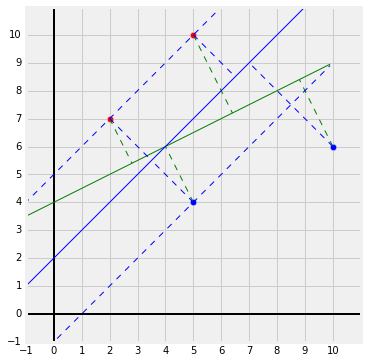

In [197]:
##### b = np.array([0.5, -1])
X = np.array([(2,7), (5,10), (5,4), (10,6)])
y = np.array([-1,-1,1,1])

#----------------------------
plt.figure(1, figsize=(8, 6))
plt.axhline(0, color='k', linewidth=2)
plt.axvline(0, color='k', linewidth=2)
plt.grid(True, which='both')
plt.axes().set_aspect('equal')

plt.xlim(-1, 11)
plt.ylim(-1, 11)

major_ticks = np.arange(-1, 11, 1)                                              

plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks)                                                       

#----------------------------
b1= 0.5
b = 4
eq= "{} * x+{}".format(b1,b)

splot(eq,c='g')
for x in X:
    d,c1,x1,y1 = xpoint(b1, b, x[0], x[1])
    if (d < 1): c='r' 
    elif (d ==1): c ='k' 
    else: c = 'b'
    plt.scatter(x[0], x[1], c=c, s=40);
    print (d , c1, x[0], x[1], x1, y1 )
    plt.plot([x[0],x1],[x[1],y1], "g--")
#----------------------------

clf = SVC(kernel="linear")
clf.fit(X,y)
print(clf.intercept_, clf.coef_)
b = -clf.intercept_[0]/clf.coef_[0][-1]
B = -clf.coef_[0] / clf.coef_[-1]
b1= -B[0]

eq= "{} * x + {}".format(b1,b)
print(clf.coef_, "=", b, "=", B, -B[0], eq)
splot(eq, c='b')

bb = -(clf.intercept_[0]-1)/clf.coef_[0][-1]
eq= "{} * x + {}".format(-B[0],bb)
splot(eq, c='b--')
bb = -(clf.intercept_[0]+1)/clf.coef_[0][-1]
eq= "{} * x + {}".format(-B[0],bb)
splot(eq, c='b--')

for x in X:
    d,c1,x1,y1 = xpoint(b1, b, x[0], x[1])
    if (d < 1): c='r' 
    elif (d ==1): c ='k' 
    else: c = 'b'
    plt.scatter(x[0], x[1], c=c, s=40);
    print (d , c1, x[0], x[1], x1, y1 )
    plt.plot([x[0],x1],[x[1],y1], "b--")



In [151]:
b = -clf.intercept_[0]/clf.coef_[0][-1]
B = -clf.coef_[0] / clf.coef_[-1]

eq= "{} * x + {}".format(-B[0],b)
print(clf.coef_, "=", b, "=", B, -B[0], eq)

[[ 0.33 -0.33]] = 2.0 = [-1. -1.] 1.0 1.0 * x + 2.000000000000001


''

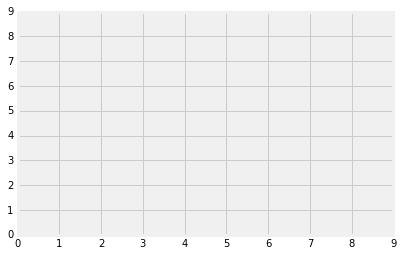

In [173]:
# major ticks every 20, minor ticks every 5                                      
major_ticks = np.arange(0, 10, 1)                                              
minor_ticks = np.arange(0, 10, 1)                                               

plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks)                                                       
;
# and a corresponding grid                                                       

#plt.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
#plt.grid(which='minor', alpha=0.2)                                              
#plt.grid(which='major', alpha=0.5)                                                
